In [2]:
import os
import numpy as np
import pandas as pd
import nasdaqdatalink as ndl

from config import * 

In [20]:
ndl.ApiConfig.api_key = '7Co5zu-KeVjbDdv82sqs'
ust_maturities = [1, 2, 3, 5, 7, 10, 20, 30]

df = pd.DataFrame()
for mat in ust_maturities:
    tdf = ndl.get(f'YC/USA{mat}Y')
    tdf.columns = [mat]
    if df.empty: df = tdf
    else: df = df.join(tdf, how ='outer')        
df = df.sort_index()

spread_df = pd.DataFrame()
for i in range(len(ust_maturities)-1):    
    near = ust_maturities[i]
    far = ust_maturities[i+1]
    spread_df[f'{far}-{near}'] = df[far] - df[near]     

In [23]:
YIELD_CURVE_MATURITIES = [1, 2, 5, 10, 20, 30,]
YIELD_CURVE_STARTING_YIELDS = {1: 5, 2: 5.5, 5: 7, 10: 8.5, 20: 9, 30: 12}

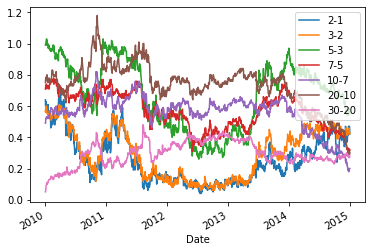

In [24]:
spread_df.plot()

In [30]:
spread_df.describe()

,2-1,3-2,5-3,7-5,10-7,20-10,30-20
count,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000
mean,0.254580,0.295907,0.669456,0.570807,0.562526,0.738042,0.297562
std,0.148954,0.157427,0.213425,0.114669,0.106854,0.134483,0.076120
min,0.040000,0.060000,0.260000,0.300000,0.180000,0.290000,0.050000
25%,0.120000,0.130000,0.470000,0.480000,0.540000,0.680000,0.250000
50%,0.220000,0.300000,0.710000,0.570000,0.580000,0.750000,0.290000
75%,0.360000,0.440000,0.840000,0.670000,0.620000,0.810000,0.360000
max,0.700000,0.610000,1.030000,0.780000,0.820000,1.180000,0.480000


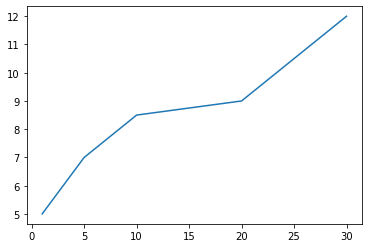

In [28]:
yc = pd.Series(YIELD_CURVE_STARTING_YIELDS)
yc.plot()

In [ ]:
class BrownianMotion():
    
    def __init__(self, start):
        self.x0 = start
        
    def random_walk(self, steps):
        
    
    

In [ ]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def stock_price(
                    self,
                    s0=100,
                    mu=0.2,
                    sigma=0.68,
                    deltaT=52,
                    dt=0.1
                    ):
        """
        Models a stock price S(t) using the Weiner process W(t) as
        `S(t) = S(0).exp{(mu-(sigma^2/2).t)+sigma.W(t)}`
        
        Arguments:
            s0: Iniital stock price, default 100
            mu: 'Drift' of the stock (upwards or downwards), default 1
            sigma: 'Volatility' of the stock, default 1
            deltaT: The time period for which the future prices are computed, default 52 (as in 52 weeks)
            dt (optional): The granularity of the time-period, default 0.1
        
        Returns:
            s: A NumPy array with the simulated stock prices over the time-period deltaT
        """
        n_step = int(deltaT/dt)
        time_vector = np.linspace(0,deltaT,num=n_step)
        # Stock variation
        stock_var = (mu-(sigma**2/2))*time_vector
        # Forcefully set the initial value to zero for the stock price simulation
        self.x0=0
        # Weiner process (calls the `gen_normal` method)
        weiner_process = sigma*self.gen_normal(n_step)
        # Add two time series, take exponent, and multiply by the initial stock price
        s = s0*(np.exp(stock_var+weiner_process))
        
        return s

In [22]:
np.random.randint(2)

0